<a href="https://colab.research.google.com/github/chaiminwoo0223/Machine-Learning/blob/main/05_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
# 농어의 길이와 무게
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split                  # 훈련 세트와 테스트 세트 분할(3:1)
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42)

In [4]:
print(train_input) # 농어의 길이

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]


In [5]:
print(train_target) # 농어의 무게

[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]


In [6]:
# 샘플 데이터를 2차원 배열로 변환
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [7]:
from sklearn.neighbors import KNeighborsRegressor # k - 최근접 이웃 회귀 알고리즘
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target) # 훈련

KNeighborsRegressor(n_neighbors=3)

In [8]:
print(knr.predict([[50]])) # 50cm 농어의 무게 예측

[1033.33333333]


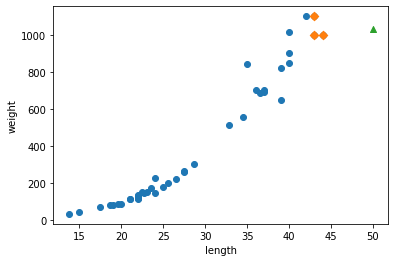

In [9]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]]) # 50cm 농어의 이웃 (거리,인덱스)
plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D') # 이웃 표시
plt.scatter(50,1033,marker='^') # 50cm 농어의 데이터
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [10]:
train_target[indexes] # 50cm 농어의 이웃 무게

array([[1000., 1000., 1100.]])

In [11]:
print(np.mean(train_target[indexes])) # 50cm 농어의 이웃 무게 평균

1033.3333333333333


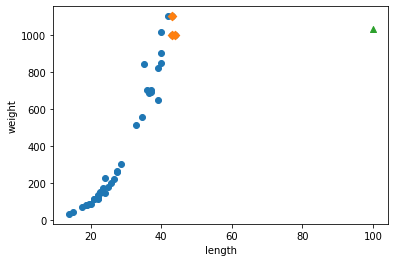

In [12]:
distances, indexes = knr.kneighbors([[100]]) # 100cm 농어의 이웃 (거리,인덱스)
plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D') # 이웃 표시
plt.scatter(100,1033,marker='^') # 100cm 농어의 데이터
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression # 선형 회귀 모델
lr = LinearRegression()
lr.fit(train_input,train_target) # 훈련
print(lr.predict([[50]])) # 50cm 농어의 무게 예측
print(lr.predict([[100]])) # 100cm 농어의 무게 예측

[1241.83860323]
[3192.69585141]


In [14]:
print(lr.score(test_input,test_target)) # 테스트

0.8247503123313558


In [15]:
print(lr.coef_,lr.intercept_) # coef_: 기울기(a), intercept_: 절편(b), y = ax + b

[39.01714496] -709.0186449535477


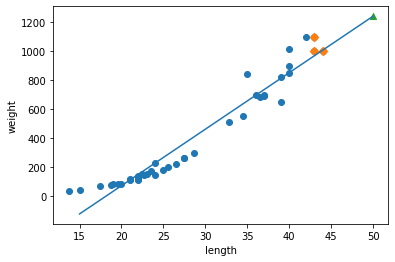

In [16]:
plt.scatter(train_input,train_target) # 훈련 세트의 산점도
plt.plot([15,50],[15*lr.coef_ + lr.intercept_,50*lr.coef_ + lr.intercept_]) # 15에서 50까지 그래프 그리기, y = ax + b
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(50,1241.8,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

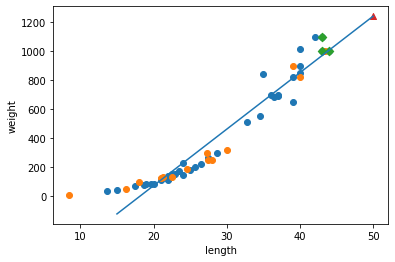

In [17]:
plt.scatter(train_input,train_target) # 훈련 세트의 산점도
plt.scatter(test_input,test_target) # 테스트 세트의 산점도
plt.plot([15,50],[15*lr.coef_ + lr.intercept_,50*lr.coef_ + lr.intercept_]) # 15에서 50까지 그래프 그리기, y = ax + b
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(50,1241.8,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [18]:
print(lr.score(train_input,train_target)) # 훈련 세트 평가
print(lr.score(test_input,test_target)) # 테스트 세트 평가

0.939846333997604
0.8247503123313558


In [19]:
# 이차식의 구현
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2,test_input))

In [20]:
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


In [21]:
print(train_poly[:5])
print(test_poly[:5])

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]
[[ 70.56   8.4 ]
 [324.    18.  ]
 [756.25  27.5 ]
 [453.69  21.3 ]
 [506.25  22.5 ]]


In [22]:
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.predict([[50**2,50]]))

[1573.98423528]


In [23]:
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


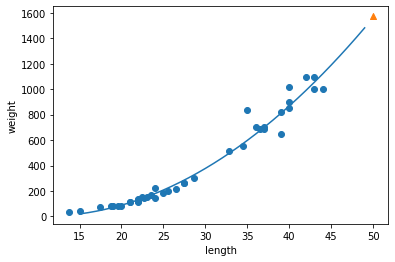

In [24]:
x = np.arange(15,50) # x의 범위
y = 1.01*x**2 - 21.6*x + 116.05 # y = ax^2 + bx + c
plt.scatter(train_input,train_target)
plt.plot(x,y) # 그래프 그리기
plt.scatter(50,1574,marker= '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

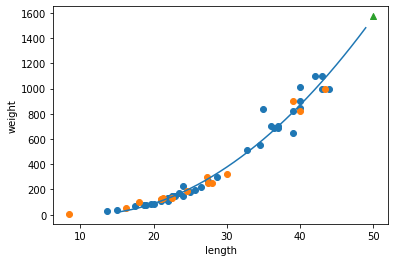

In [25]:
x = np.arange(15,50) # x의 범위
y = 1.01*x**2 - 21.6*x + 116.05 # y = ax^2 + bx + c
plt.scatter(train_input,train_target)
plt.scatter(test_input,test_target)
plt.plot(x,y) # 그래프 그리기 
plt.scatter(50,1574,marker= '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [26]:
print(lr.score(train_poly,train_target)) # 훈련 세트 평가
print(lr.score(test_poly,test_target)) # 테스트 세트 평가

0.9706807451768623
0.9775935108325122
